In [59]:
import os 
import shutil
import pandas as pd
import glob2
import matplotlib.pyplot as plt

In [101]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
import seaborn as sns
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, BatchNormalization, MaxPooling2D,GlobalAveragePooling2D,Conv3D, MaxPooling3D,GlobalAveragePooling3D
from tensorflow.keras.preprocessing import image

In [84]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam

In [85]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.applications.densenet import DenseNet169
import cv2

In [86]:
# to ignore the warnings 
import warnings
warnings.filterwarnings("ignore")

# checking the metadata

In [3]:
covid= pd.read_excel("./COVID-19_Radiography_Dataset/COVID.metadata.xlsx")
covid.head(2)

,FILE NAME,FORMAT,SIZE,URL
0,COVID-1,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
1,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...


In [4]:
lung_opacity_images = pd.read_excel("./COVID-19_Radiography_Dataset/Lung_Opacity.metadata.xlsx")
lung_opacity_images.head(2)

,FILE NAME,FORMAT,SIZE,URL
0,Lung_Opacity-1,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
1,Lung_Opacity-2,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...


In [5]:
normal= pd.read_excel("./COVID-19_Radiography_Dataset/Normal.metadata.xlsx")
normal.head(2)

,FILE NAME,FORMAT,SIZE,URL
0,NORMAL-1,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
1,NORMAL-2,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...


In [6]:
pneumonia = pd.read_excel("./COVID-19_Radiography_Dataset/Viral Pneumonia.metadata.xlsx")
pneumonia.head(2)

,FILE NAME,FORMAT,SIZE,URL
0,Viral Pneumonia-1,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
1,Viral Pneumonia-2,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...


In [7]:
#working with image data

In [76]:
path = []
for dirname, _, filenames in os.walk('/COVID-19_Radiography_Dataset'):
    for filename in filenames:
        if (filename[-3:] == 'png'):
            path.append(os.path.join(dirname, filename))
            
fullpath = "/Users/irfana/Documents/futuraLabs_project/COVID-19_Radiography_Dataset"
os.listdir(fullpath)

['Lung_Opacity.metadata.xlsx',
 'Viral Pneumonia.metadata.xlsx',
 '.DS_Store',
 'Viral Pneumonia',
 'COVID.metadata.xlsx',
 'Normal.metadata.xlsx',
 'Lung_Opacity',
 'Normal',
 'COVID',
 'README.md.txt']

In [80]:
normal_images = []
images_together = []

count = 0



In [87]:
for img_path in glob.glob(fullpath + "/Normal/*"):
    count += 1
    normal_images.append(image.load_img(str(img_path), target_size = (150,150,3)))
   
    if count >1000:
        break



    

In [88]:
covid_images = []
count = 0
for img_path in glob.glob(fullpath + "/COVID/*"):
    count += 1
    covid_images.append(image.load_img(str(img_path), target_size = (150,150,3)))
    if count > 1000:
        break



In [89]:
Lung_opcaity = []
count = 0


for img_path in glob.glob(fullpath + "/Lung_Opacity/*"):
    count += 1
    Lung_opcaity.append(image.load_img(str(img_path), target_size = (150,150,3)))
    if count > 1000:
        break



In [90]:

Viral_pneumonia = []
count = 0
for img_path in glob.glob(fullpath + "/Viral Pneumonia/*"):
    count += 1
    Viral_pneumonia.append(image.load_img(str(img_path), target_size = (150,150,3)))
    if count >1000:
        break

In [91]:
y=[]

for i in normal_images:
    images_together.append(img_to_array(i))
    y.append(0)

In [92]:
for i in covid_images:
    images_together.append(img_to_array(i))
    y.append(1)

In [93]:
for i in Lung_opcaity:
    images_together.append(img_to_array(i))
    y.append(2)

In [94]:
for i in Viral_pneumonia:
    images_together.append(img_to_array(i))
    y.append(3)

In [95]:
print("Lenth of all images ",len(images_together))
print("Lenth of y ",len(y))
from tensorflow.keras.utils import to_categorical
y=to_categorical(y)

Lenth of all images  4003
Lenth of y  4003


In [96]:
images_together = np.array(images_together)
print("shape of images together: ",images_together.shape)

shape of images together:  (4003, 150, 150, 3)


In [ ]:
# splitting the data into train and test

In [98]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(images_together, y, test_size=0.25, stratify=y)


In [99]:
images_together = np.concatenate((X_train, x_test))
y = np.concatenate((y_train, y_test))

#  building a cnn model

In [103]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size =(3,3), activation = "relu", input_shape=(150,150,3), kernel_initializer='he_normal',))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(filters = 64, kernel_size =(3,3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(filters = 128, kernel_size =(3,3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2,2), strides = (1,1)))
model.add(Dropout(0.25))
#fully connected
model.add(Flatten())
# we have 4 classes
model.add(Dense(4, activation = "softmax"))
# compile 
model.compile(loss = "categorical_crossentropy",
             optimizer = "adam",
             metrics = ["accuracy"])


# model summary

In [104]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 33, 33, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 33, 33, 128)      

# deep learning process

In [105]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True,
                                  validation_split = 0.25)

In [106]:
train_generator = train_datagen.flow(
images_together, y,
batch_size = 40,
subset = "training")

In [107]:
validation_generator = train_datagen.flow(
images_together, y,
batch_size = 40,
shuffle = False,
subset = "validation")

In [109]:
# implementing early stopping and model check point 

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

es = EarlyStopping(monitor= "val_accuracy" , min_delta= 0.01, patience= 3, verbose=1)
mc = ModelCheckpoint(filepath="bestmodel.h5", monitor="val_accuracy", verbose=1, save_best_only= True)

In [110]:
# model fitting


hist = model.fit(
train_generator,
steps_per_epoch = 10,
validation_data = validation_generator,
epochs = 35,
validation_steps= 16, 
callbacks=[es,mc])

Epoch 1/35
10/10 [==============================] - 17s 2s/step - loss: 0.6525 - accuracy: 0.7355 - val_loss: 0.6916 - val_accuracy: 0.7234

Epoch 00001: val_accuracy improved from -inf to 0.72344, saving model to bestmodel.h5
Epoch 2/35
10/10 [==============================] - 22s 2s/step - loss: 0.5829 - accuracy: 0.7750 - val_loss: 0.5006 - val_accuracy: 0.8266

Epoch 00002: val_accuracy improved from 0.72344 to 0.82656, saving model to bestmodel.h5
Epoch 3/35
10/10 [==============================] - 21s 2s/step - loss: 0.5013 - accuracy: 0.8125 - val_loss: 0.5533 - val_accuracy: 0.7688

Epoch 00003: val_accuracy did not improve from 0.82656
Epoch 4/35
10/10 [==============================] - 22s 2s/step - loss: 0.4865 - accuracy: 0.8050 - val_loss: 0.5198 - val_accuracy: 0.8125

Epoch 00004: val_accuracy did not improve from 0.82656
Epoch 5/35
10/10 [==============================] - 18s 2s/step - loss: 0.4849 - accuracy: 0.8275 - val_loss: 0.5019 - val_accuracy: 0.8125

Epoch 0000

In [111]:
## load only the best model 
from keras.models import load_model
model = load_model("bestmodel.h5")

In [112]:
h = hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

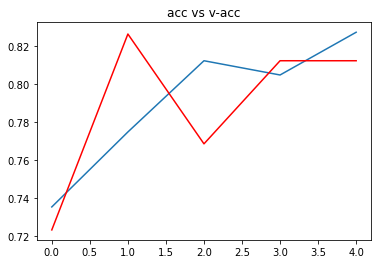

In [113]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

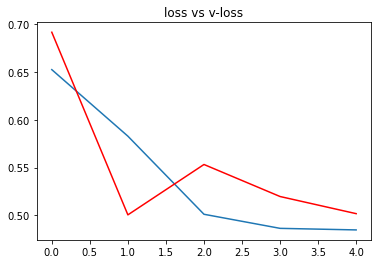

In [114]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()


In [117]:
# checking out the accurscy of our model 

test_loss,test_acc=model.evaluate(x_test,y_test)



32/32 [==============================] - 6s 183ms/step - loss: 64.9987 - accuracy: 0.7662


In [118]:
from sklearn.metrics import classification_report
prediction = model.predict(x_test, batch_size=40)
prediction = np.argmax(prediction, axis=1)
print(classification_report(y_test.argmax(axis=1), prediction, digits = 3))

              precision    recall  f1-score   support

           0      0.585     0.892     0.707       250
           1      0.899     0.534     0.670       251
           2      0.808     0.688     0.743       250
           3      0.922     0.952     0.937       250

    accuracy                          0.766      1001
   macro avg      0.804     0.766     0.764      1001
weighted avg      0.804     0.766     0.764      1001

